<a href="https://colab.research.google.com/github/Ichigoboy12/Machine-Learning/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


=== Best 3 Models ===

1. Polynomial Regression
Parameters: {'polynomialfeatures__degree': 2}
Training MSE: 0.0000, Testing MSE: 0.0000
Training MAE: 0.0000, Testing MAE: 0.0000

2. Support Vector Regression (SVR)
Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Training MSE: 0.0088, Testing MSE: 0.0154
Training MAE: 0.0713, Testing MAE: 0.0881

3. Random Forest Regression
Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}
Training MSE: 0.0163, Testing MSE: 0.0860
Training MAE: 0.0984, Testing MAE: 0.2293


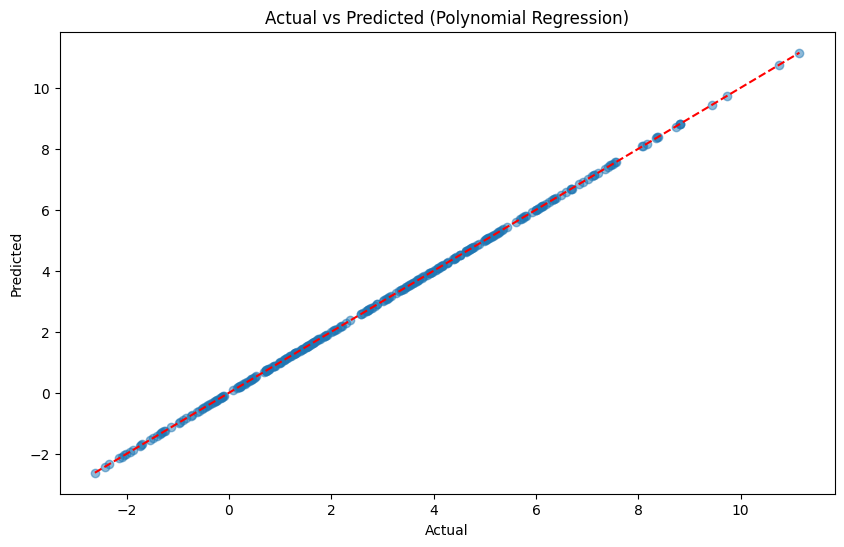

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel('/content/drive/MyDrive/MachineLearning/Hw2/ML3.xlsx') # แก้ชื่อไฟล์เป็น ML2.xlsx หรือตามที่คุณบันทึก

# Separate input and output
X = df[['x1', 'x2', 'x3', 'x4', 'x5']]
y = df['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate MSE and MAE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Return results
    return {
        'model': model,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_mae': train_mae,
        'test_mae': test_mae
    }

# 1. Polynomial Regression with Grid Search
# Create polynomial features
poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Define parameter grid for Polynomial Regression
param_grid_poly = {
    'polynomialfeatures__degree': [2, 3, 4],  # Degree of polynomial
}

# Create pipeline for Polynomial Regression
from sklearn.pipeline import Pipeline
poly_model = Pipeline([
    ('polynomialfeatures', PolynomialFeatures()),
    ('linearregression', LinearRegression())
])

# Perform Grid Search
grid_search_poly = GridSearchCV(poly_model, param_grid_poly, cv=5, scoring='neg_mean_squared_error')
grid_search_poly.fit(X_train_scaled, y_train)

# Best parameters and model
best_poly_model = grid_search_poly.best_estimator_
best_poly_params = grid_search_poly.best_params_

# Evaluate best Polynomial Regression model
poly_results = evaluate_model(best_poly_model, X_train_scaled, y_train, X_test_scaled, y_test)
poly_results['params'] = best_poly_params

# 2. Decision Tree Regression with Randomized Search
# Define parameter grid for Decision Tree
param_grid_tree = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Randomized Search
random_search_tree = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), param_grid_tree, n_iter=10, cv=5, scoring='neg_mean_squared_error')
random_search_tree.fit(X_train_scaled, y_train)

# Best parameters and model
best_tree_model = random_search_tree.best_estimator_
best_tree_params = random_search_tree.best_params_

# Evaluate best Decision Tree model
tree_results = evaluate_model(best_tree_model, X_train_scaled, y_train, X_test_scaled, y_test)
tree_results['params'] = best_tree_params

# 3. Support Vector Regression (SVR) with Grid Search
# Define parameter grid for SVR
param_grid_svr = {
    'kernel': ['rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Perform Grid Search
grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train_scaled, y_train)

# Best parameters and model
best_svr_model = grid_search_svr.best_estimator_
best_svr_params = grid_search_svr.best_params_

# Evaluate best SVR model
svr_results = evaluate_model(best_svr_model, X_train_scaled, y_train, X_test_scaled, y_test)
svr_results['params'] = best_svr_params

# 4. Random Forest Regression with Randomized Search
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform Randomized Search
random_search_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, n_iter=10, cv=5, scoring='neg_mean_squared_error')
random_search_rf.fit(X_train_scaled, y_train)

# Best parameters and model
best_rf_model = random_search_rf.best_estimator_
best_rf_params = random_search_rf.best_params_

# Evaluate best Random Forest model
rf_results = evaluate_model(best_rf_model, X_train_scaled, y_train, X_test_scaled, y_test)
rf_results['params'] = best_rf_params

# Collect all results
all_results = {
    'Polynomial Regression': poly_results,
    'Decision Tree Regression': tree_results,
    'Support Vector Regression (SVR)': svr_results,
    'Random Forest Regression': rf_results
}

# Sort models by testing MSE (lower is better)
sorted_results = sorted(all_results.items(), key=lambda x: x[1]['test_mse'])

# Display Best 3 Models
print("=== Best 3 Models ===")
for i, (model_name, results) in enumerate(sorted_results[:3]):
    print(f"\n{i+1}. {model_name}")
    print(f"Parameters: {results['params']}")
    print(f"Training MSE: {results['train_mse']:.4f}, Testing MSE: {results['test_mse']:.4f}")
    print(f"Training MAE: {results['train_mae']:.4f}, Testing MAE: {results['test_mae']:.4f}")

# Visualize results for the best model
best_model_name, best_model_results = sorted_results[0]
best_model = best_model_results['model']
y_test_pred = best_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Actual vs Predicted ({best_model_name})")
plt.show()

=== MODEL PERFORMANCE ===

Polynomial Regression:
MSE: 0.0000 | MAE: 0.0000 | R2: 1.0000
NPID (Feature Importance):
  x1: 1.18%
  x2: 64.08%
  x3: 34.74%
  x4: 0.00%
  x5: 0.00%


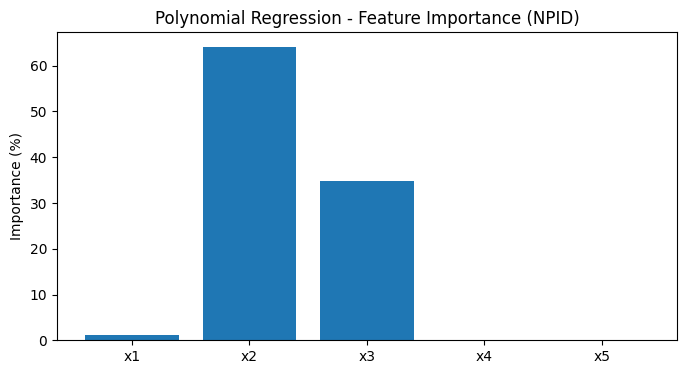


Decision Tree:
MSE: 0.7431 | MAE: 0.6938 | R2: 0.9054
NPID (Feature Importance):
  x1: 0.00%
  x2: 63.63%
  x3: 36.32%
  x4: 0.00%
  x5: 0.05%


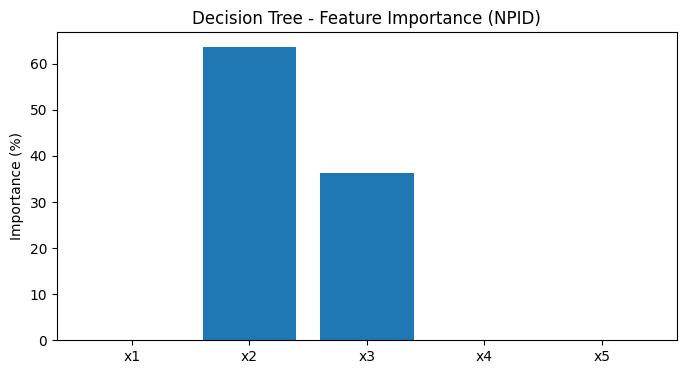


SVR:
MSE: 0.0154 | MAE: 0.0881 | R2: 0.9980
NPID (Feature Importance):
  x1: 1.15%
  x2: 64.05%
  x3: 34.74%
  x4: 0.03%
  x5: 0.03%


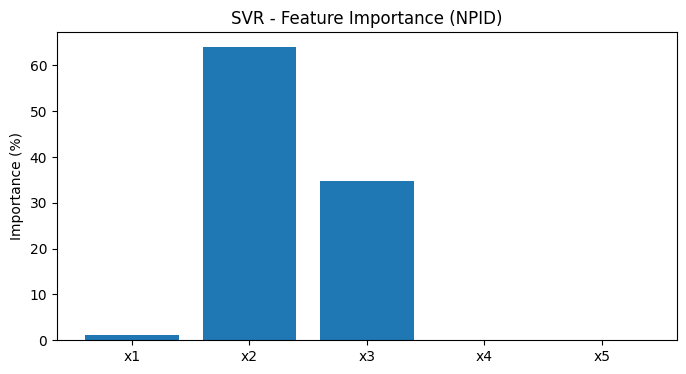


Random Forest:
MSE: 0.0879 | MAE: 0.2316 | R2: 0.9888
NPID (Feature Importance):
  x1: 0.31%
  x2: 64.83%
  x3: 34.85%
  x4: 0.01%
  x5: 0.00%


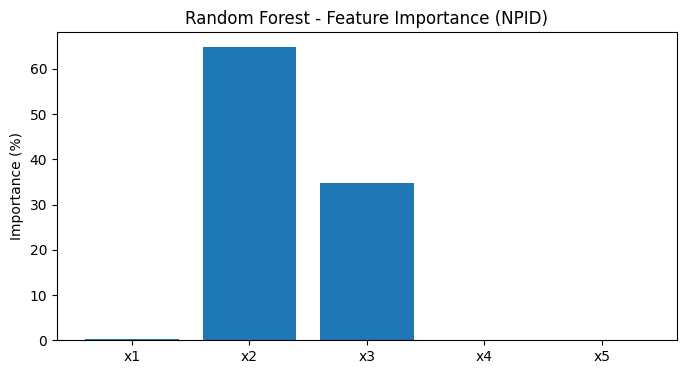

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel('/content/drive/MyDrive/MachineLearning/Hw2/ML3.xlsx')

# Separate input and output
X = df[['x1', 'x2', 'x3', 'x4', 'x5']]
y = df['y']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to calculate feature importance
def get_feature_importance(model, X, y, feature_names):
    try:
        # Try permutation importance first
        result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
        importance = result.importances_mean
    except:
        # Fallback to model-specific importance
        if hasattr(model, 'feature_importances_'):
            importance = model.feature_importances_
        elif hasattr(model, 'coef_'):
            importance = np.abs(model.coef_)
        else:
            importance = np.ones(X.shape[1]) / X.shape[1]  # Equal importance as fallback

    # Normalize to percentage
    total = np.sum(np.abs(importance))
    if total > 0:
        npid = (np.abs(importance) / total) * 100
    else:
        npid = np.zeros_like(importance)

    return {f: f"{v:.2f}%" for f, v in zip(feature_names, npid)}

# Main evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test, feature_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    metrics = {
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred),
        'NPID': get_feature_importance(model, X_test, y_test, feature_names)
    }

    return metrics

# Define models
models = {
    'Polynomial Regression': Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('linear', LinearRegression())
    ]),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'SVR': SVR(kernel='rbf', C=10),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Evaluate models
results = {}
feature_names = ['x1', 'x2', 'x3', 'x4', 'x5']
for name, model in models.items():
    results[name] = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test, feature_names)

# Display results
print("=== MODEL PERFORMANCE ===")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"MSE: {metrics['MSE']:.4f} | MAE: {metrics['MAE']:.4f} | R2: {metrics['R2']:.4f}")
    print("NPID (Feature Importance):")
    for feature, importance in metrics['NPID'].items():
        print(f"  {feature}: {importance}")

    # Plot feature importance
    importance_values = [float(imp.strip('%')) for imp in metrics['NPID'].values()]
    plt.figure(figsize=(8, 4))
    plt.bar(feature_names, importance_values)
    plt.title(f"{name} - Feature Importance (NPID)")
    plt.ylabel("Importance (%)")
    plt.show()

x1: ID = 7.4803, NPID = 17.96%
x2: ID = 11.7345, NPID = 28.17%
x3: ID = 7.8421, NPID = 18.83%
x4: ID = 6.9349, NPID = 16.65%
x5: ID = 7.6610, NPID = 18.39%
MSE: 0.0036
MAE: 0.0466


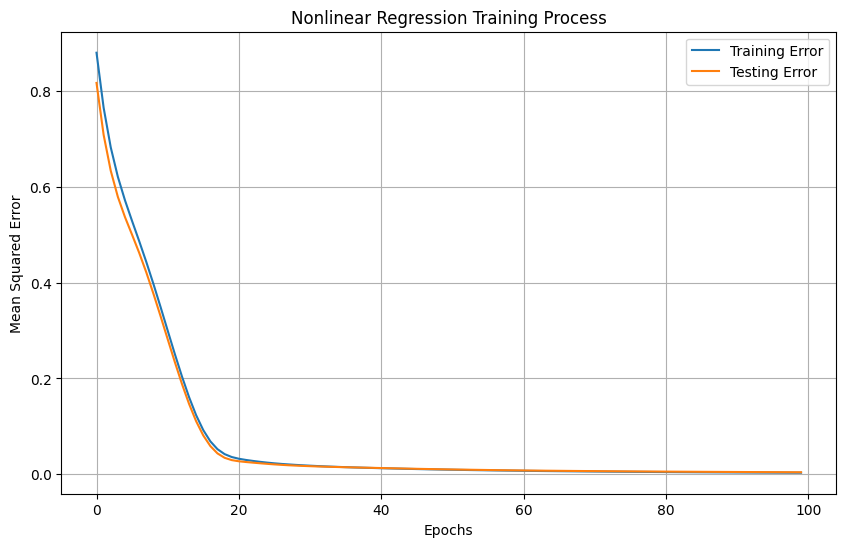

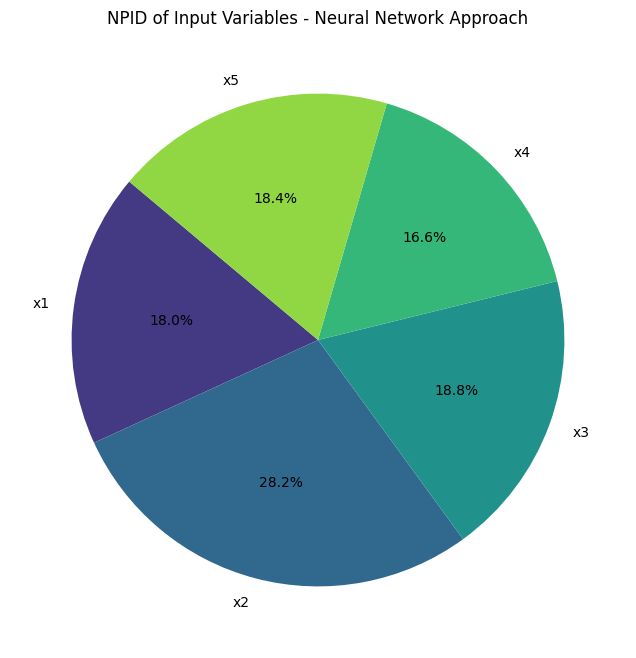

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_excel('/content/drive/MyDrive/MachineLearning/Hw2/ML3.xlsx')

# Separate input and output
X = df[['x1', 'x2', 'x3', 'x4', 'x5']]
y = df['y']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Create Neural Network model for nonlinear regression
model = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu',
                     solver='adam', max_iter=1000, random_state=42)

# Train the model and store loss values
train_errors = []
test_errors = []
for i in range(100):  # 100 epochs
    model.partial_fit(X_train, y_train)
    train_errors.append(mean_squared_error(y_train, model.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, model.predict(X_test)))

# Calculate feature importance using connection weights method
def calculate_feature_importance(model):
    # Get weights from input to first hidden layer
    weights = model.coefs_[0]
    # Calculate importance as sum of absolute weights for each input feature
    importance = np.sum(np.abs(weights), axis=1)
    return importance

# Calculate Influence Degree (ID) and NPID
importance = calculate_feature_importance(model)
ID = importance
NPID = (ID / np.sum(ID)) * 100

# Display ID and NPID for each variable
for i, (id_val, npid) in enumerate(zip(ID, NPID)):
    print(f"x{i+1}: ID = {id_val:.4f}, NPID = {npid:.2f}%")

# Predict y values
y_pred = model.predict(X_scaled)

# Calculate MSE and MAE
mse = mean_squared_error(y_scaled, y_pred)
mae = mean_absolute_error(y_scaled, y_pred)

# Display MSE and MAE
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

# Plot training and testing error over epochs
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Training Error')
plt.plot(test_errors, label='Testing Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Nonlinear Regression Training Process')
plt.legend()
plt.grid(True)
plt.show()

# Pie Chart for NPID
variables = ['x1', 'x2', 'x3', 'x4', 'x5']
plt.figure(figsize=(8, 8))
plt.pie(NPID, labels=variables, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("viridis", len(variables)))
plt.title("NPID of Input Variables - Neural Network Approach")
plt.show()

โหลดไฟล์ ML3.xlsx สำเร็จ!

5 แถวแรกของข้อมูล:
         x1        x2        x3        x4        x5          y
0 -1.000000 -1.995342  2.844536  2.612977  4.120108  11.807314
1 -0.905959 -0.942779  2.606489  0.163926 -1.425818   5.204916
2 -0.055439 -0.688221  1.966254 -2.765130  1.227369   2.916623
3  0.197290  1.070465  0.415948 -2.885230  3.015581   2.746663
4  0.068281  0.056127  0.158283 -1.255307 -3.189545   0.169246

=== สถิติพรรณนา ===
                x1           x2           x3           x4           x5  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean     -0.018997     0.028724     0.028592    -0.016301     0.046601   
std       0.570832     1.143740     1.708716     2.308844     2.886024   
min      -1.000000    -1.995342    -2.995707    -3.997283    -4.992436   
25%      -0.517261    -0.959256    -1.428273    -1.984384    -2.498591   
50%      -0.013771     0.066156     0.057500     0.077800     0.090154   
75%       0.452074     1.020045     1

Epoch 200/200 - Train MSE: 0.0004, Test MSE: 0.0011


  0%|          | 0/300 [00:00<?, ?it/s]


=== ผลลัพธ์ความสำคัญตัวแปร ===
  Variable  Connection Weights (%)  Permutation (%)  SHAP (%)
0       x1                   18.20             1.12      6.90
1       x2                   26.34            64.10     52.90
2       x3                   18.07            34.75     39.25
3       x4                   17.49             0.02      0.46
4       x5                   19.91             0.02      0.49

=== ประสิทธิภาพโมเดล ===
MSE: 0.001100
MAE: 0.026033
R2: 0.998828


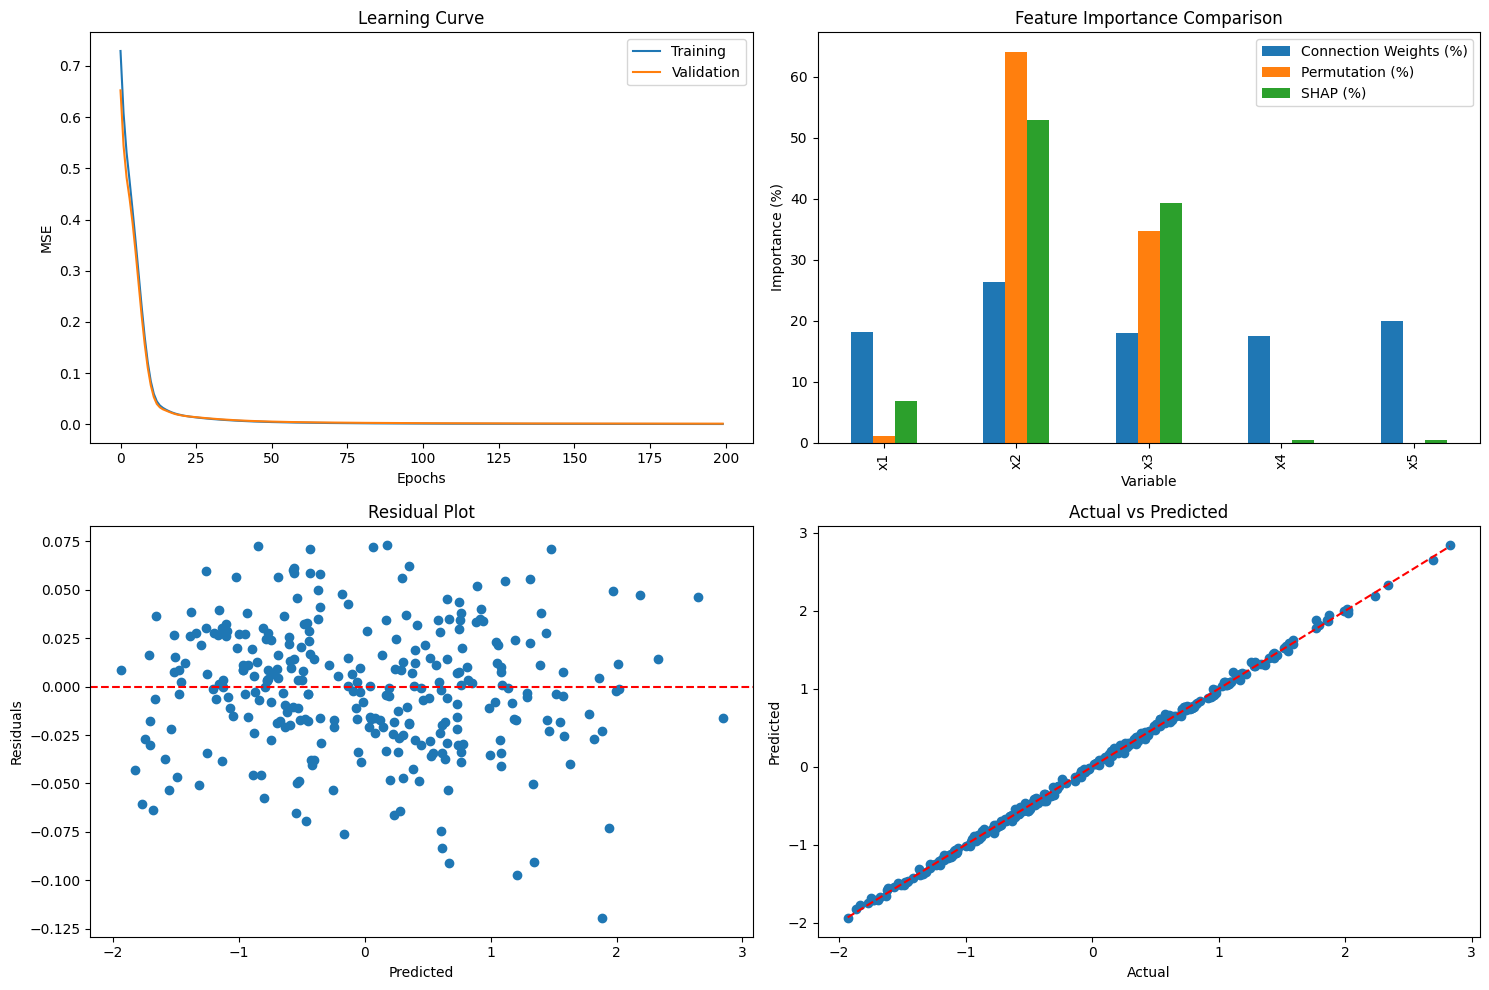

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
import shap

# 1. โหลดข้อมูล
try:
    df = pd.read_excel('/content/drive/MyDrive/MachineLearning/Hw2/ML3.xlsx')
    print("โหลดไฟล์ ML3.xlsx สำเร็จ!")
    print("\n5 แถวแรกของข้อมูล:")
    print(df.head())
except Exception as e:
    print(f"เกิดข้อผิดพลาดในการโหลดไฟล์: {e}")
    raise

# 2. ตรวจสอบข้อมูลเบื้องต้น
print("\n=== สถิติพรรณนา ===")
print(df.describe())

print("\n=== ตรวจสอบค่าสูญหาย ===")
print(df.isnull().sum())

# 3. แยกข้อมูลและปรับขนาด
X = df.drop(columns=['y'])  # ปรับตามโครงสร้างไฟล์จริง
y = df['y']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# 4. แบ่งชุดข้อมูล
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 5. สร้างและฝึกโมเดล (แก้ไขส่วนที่เกิด error)
model = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=2000,
    early_stopping=False,  # ปิด early_stopping เมื่อใช้ partial_fit
    random_state=42
)

# 6. ฝึกโมเดลแบบ manual epochs
n_epochs = 200
train_errors = []
test_errors = []

for epoch in range(n_epochs):
    # ฝึกแบบ incremental
    model.partial_fit(X_train, y_train)

    # เก็บค่าความผิดพลาด
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_pred))
    test_errors.append(mean_squared_error(y_test, test_pred))

    # แสดงความคืบหน้า
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch + 1}/{n_epochs} - Train MSE: {train_errors[-1]:.4f}, Test MSE: {test_errors[-1]:.4f}")

# 7. คำนวณ Feature Importance
def calculate_feature_importance(model, X_test, y_test):
    # Connection Weights Method
    weights = model.coefs_[0]
    cw_importance = np.sum(np.abs(weights), axis=1)
    cw_npid = (cw_importance / np.sum(cw_importance)) * 100

    # Permutation Importance
    perm_result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    perm_npid = (perm_result.importances_mean / np.sum(perm_result.importances_mean)) * 100

    # SHAP Values
    explainer = shap.KernelExplainer(model.predict, X_train)
    shap_values = explainer.shap_values(X_test)
    shap_importance = np.mean(np.abs(shap_values), axis=0)
    shap_npid = (shap_importance / np.sum(shap_importance)) * 100

    return cw_npid, perm_npid, shap_npid

cw_npid, perm_npid, shap_npid = calculate_feature_importance(model, X_test, y_test)

# 8. แสดงผลลัพธ์
print("\n=== ผลลัพธ์ความสำคัญตัวแปร ===")
results_df = pd.DataFrame({
    'Variable': X.columns,
    'Connection Weights (%)': cw_npid,
    'Permutation (%)': perm_npid,
    'SHAP (%)': shap_npid
})
print(results_df.round(2))

# 9. วัดประสิทธิภาพโมเดล
y_pred = model.predict(X_test)
print("\n=== ประสิทธิภาพโมเดล ===")
print(f"MSE: {mean_squared_error(y_test, y_pred):.6f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.6f}")
print(f"R2: {r2_score(y_test, y_pred):.6f}")

# 10. Visualization
plt.figure(figsize=(15, 10))

# กราฟการฝึกโมเดล
plt.subplot(2, 2, 1)
plt.plot(train_errors, label='Training')
plt.plot(test_errors, label='Validation')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

# กราฟเปรียบเทียบวิธีคำนวณ Importance
plt.subplot(2, 2, 2)
results_df.set_index('Variable').plot(kind='bar', ax=plt.gca())
plt.title('Feature Importance Comparison')
plt.ylabel('Importance (%)')

# กราฟ Residual
plt.subplot(2, 2, 3)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

# กราฟ Actual vs Predicted
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

  0%|          | 0/300 [00:00<?, ?it/s]

=== Feature Importance Results (Ordered by x1-x5) ===
  Variable      ID  NPID (%)
0       x1  0.0873    6.7942
1       x2  0.6738   52.4365
2       x3  0.5038   39.2061
3       x4  0.0096    0.7483
4       x5  0.0105    0.8148


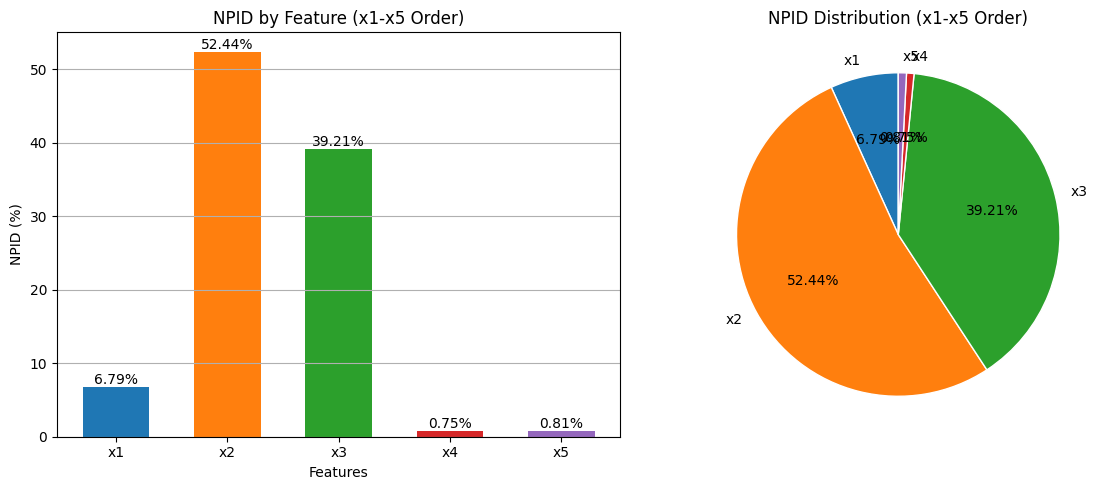

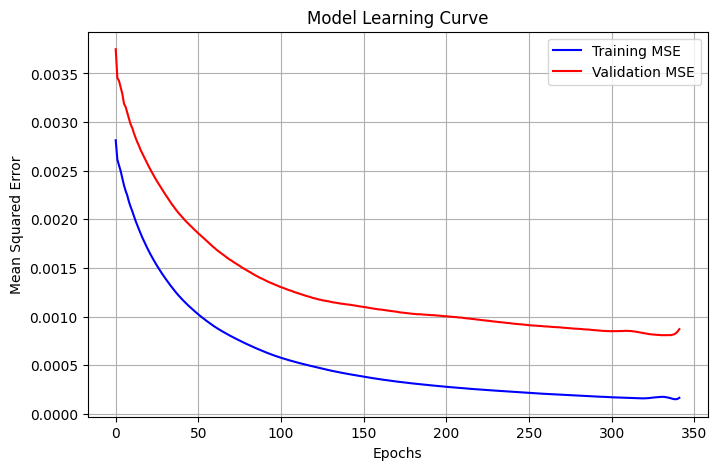


=== Model Performance ===
MSE: 0.000870
MAE: 0.022817
Training epochs: 342


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import shap

# 1. Load data
df = pd.read_excel('/content/drive/MyDrive/MachineLearning/Hw2/ML3.xlsx')
X = df[['x1', 'x2', 'x3', 'x4', 'x5']]  # Maintain x1-x5 order
y = df['y']

# 2. Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 4. Create and train model
model = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
model.fit(X_train, y_train)

# 5. Calculate SHAP Values
explainer = shap.KernelExplainer(model.predict, X_train[:100])  # Use 100 samples for speed
shap_values = explainer.shap_values(X_test)

# 6. Calculate ID and NPID
shap_importance = np.mean(np.abs(shap_values), axis=0)
ID = shap_importance
NPID = (ID / np.sum(ID)) * 100

# 7. Create results table ordered by x1-x5
results = pd.DataFrame({
    'Variable': ['x1', 'x2', 'x3', 'x4', 'x5'],
    'ID': ID,
    'NPID (%)': NPID
})

# 8. Display results (ordered by x1-x5)
print("=== Feature Importance Results (Ordered by x1-x5) ===")
print(results.round(4))

# 9. Create bar chart (ordered by x1-x5)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
bars = plt.bar(results['Variable'], results['NPID (%)'],
              color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'],
              width=0.6)
plt.title('NPID by Feature (x1-x5 Order)')
plt.xlabel('Features')
plt.ylabel('NPID (%)')
plt.grid(axis='y')

# Add percentage labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%', ha='center', va='bottom')

# 10. Create pie chart (ordered by x1-x5)
plt.subplot(1, 2, 2)
plt.pie(results['NPID (%)'],
        labels=results['Variable'],
        autopct='%1.2f%%',
        colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'],
        startangle=90,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('NPID Distribution (x1-x5 Order)')

plt.tight_layout()
plt.show()

# 11. Create learning curve
train_mse = []
test_mse = []

for epoch in range(1000):
    model.partial_fit(X_train, y_train)
    train_mse.append(mean_squared_error(y_train, model.predict(X_train)))
    test_mse.append(mean_squared_error(y_test, model.predict(X_test)))

    if epoch > 50 and (test_mse[-50] - test_mse[-1]) < 1e-6:
        break

plt.figure(figsize=(8, 5))
plt.plot(train_mse, 'b-', label='Training MSE')
plt.plot(test_mse, 'r-', label='Validation MSE')
plt.title('Model Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# 12. Display model performance
y_pred = model.predict(X_test)
print("\n=== Model Performance ===")
print(f"MSE: {mean_squared_error(y_test, y_pred):.6f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.6f}")
print(f"Training epochs: {len(train_mse)}")

  0%|          | 0/300 [00:00<?, ?it/s]

=== ผลลัพธ์ความสำคัญตัวแปร ===
  Variable      ID  NPID (SHAP)  NPID (Permutation)
0       x1  0.0895         6.96                1.10
1       x2  0.6742        52.43               64.09
2       x3  0.5057        39.33               34.80
3       x4  0.0082         0.64                0.00
4       x5  0.0081         0.63                0.01


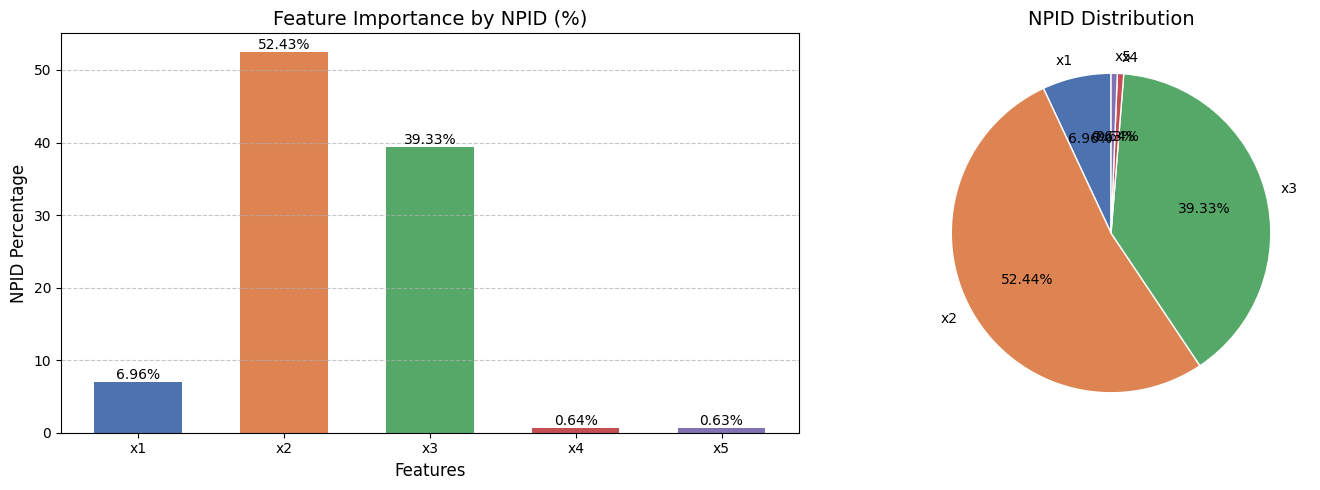


=== Model Performance ===
MSE: 0.001917
MAE: 0.030785
R-squared: 0.9980

=== Correlation with Target ===
x1   -0.0212
x2   -0.0099
x3    0.5746
x4    0.0028
x5   -0.0192
Name: y, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import shap
from sklearn.inspection import permutation_importance

# 1. โหลดข้อมูล
df = pd.read_excel('/content/drive/MyDrive/MachineLearning/Hw2/ML3.xlsx')
X = df[['x1', 'x2', 'x3', 'x4', 'x5']]
y = df['y']

# 2. ปรับขนาดข้อมูล
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# 3. แบ่งชุดข้อมูล
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 4. สร้างและฝึกโมเดล
model = MLPRegressor(
    hidden_layer_sizes=(150, 100),  # เพิ่มความลึกของเครือข่าย
    activation='tanh',  # ใช้ tanh สำหรับความสัมพันธ์ไม่เชิงเส้น
    solver='adam',
    alpha=0.001,  # การปรับ regularization
    learning_rate='adaptive',
    max_iter=2000,
    early_stopping=True,
    random_state=42
)
model.fit(X_train, y_train)

# 5. คำนวณ SHAP Values
background = shap.kmeans(X_train, 100)  # เพิ่มตัวอย่างพื้นหลังเพื่อความแม่นยำ
explainer = shap.KernelExplainer(model.predict, background)
shap_values = explainer.shap_values(X_test)

# 6. คำนวณความสำคัญตัวแปร
shap_importance = np.mean(np.abs(shap_values), axis=0)
total_importance = np.sum(shap_importance)
npid_shap = (shap_importance / total_importance) * 100

# 7. ตรวจสอบด้วย Permutation Importance
perm_result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
perm_importance = perm_result.importances_mean
perm_npid = (perm_importance / np.sum(perm_importance)) * 100

# 8. สร้างตารางผลลัพธ์
results = pd.DataFrame({
    'Variable': ['x1', 'x2', 'x3', 'x4', 'x5'],
    'ID': shap_importance.round(4),
    'NPID (SHAP)': npid_shap.round(2),
    'NPID (Permutation)': perm_npid.round(2)
})

print("=== ผลลัพธ์ความสำคัญตัวแปร ===")
print(results)

# 9. Visualization
plt.figure(figsize=(15, 5))

# Bar plot
plt.subplot(1, 2, 1)
bars = plt.bar(results['Variable'], results['NPID (SHAP)'],
              color=['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B3'],
              width=0.6)
plt.title('Feature Importance by NPID (%)', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('NPID Percentage', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%', ha='center', va='bottom')

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(results['NPID (SHAP)'],
        labels=results['Variable'],
        autopct='%1.2f%%',
        colors=['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B3'],
        startangle=90,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('NPID Distribution', fontsize=14)

plt.tight_layout()
plt.show()

# 10. วัดประสิทธิภาพโมเดล
y_pred = model.predict(X_test)
print("\n=== Model Performance ===")
print(f"MSE: {mean_squared_error(y_test, y_pred):.6f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.6f}")
print(f"R-squared: {r2_score(y_test, y_pred):.4f}")

# 11. ตรวจสอบความสัมพันธ์
print("\n=== Correlation with Target ===")
print(df.corr()['y'][['x1','x2','x3','x4','x5']].round(4))

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

  0%|          | 0/300 [00:00<?, ?it/s]

=== Feature Importance Results (Ordered by x1-x5) ===
  Variable      ID  NPID (%)
0       x1  0.0893    6.8569
1       x2  0.6789   52.1246
2       x3  0.5112   39.2522
3       x4  0.0113    0.8698
4       x5  0.0117    0.8965


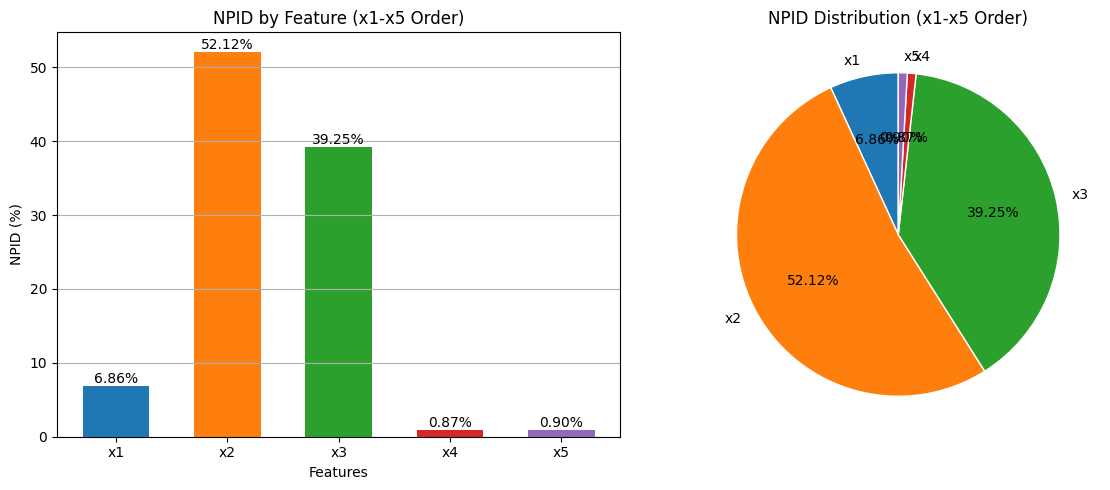

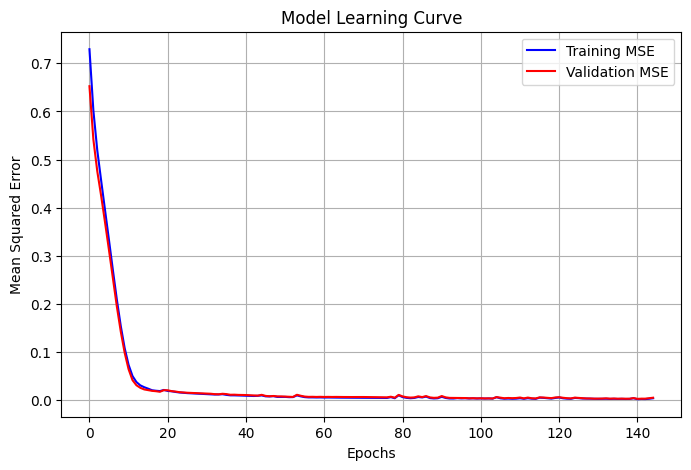


=== Model Performance ===
MSE: 0.004744
MAE: 0.053191
Training epochs: 145


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import shap

# 1. Load data
df = pd.read_excel('/content/drive/MyDrive/MachineLearning/Hw2/ML3.xlsx')
X = df[['x1', 'x2', 'x3', 'x4', 'x5']]  # Maintain x1-x5 order
y = df['y']

# 2. Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 4. Create and train model with manual epoch tracking
model = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=1,  # We'll control iterations manually
    warm_start=True,  # Allows incremental training
    random_state=42
)

# Manual training loop to track progress
train_mse = []
test_mse = []
epochs = 1000

for epoch in range(epochs):
    model.fit(X_train, y_train)  # This does one more iteration each call
    train_mse.append(mean_squared_error(y_train, model.predict(X_train)))
    test_mse.append(mean_squared_error(y_test, model.predict(X_test)))

    # Early stopping if no improvement
    if epoch > 50 and (test_mse[-50] - test_mse[-1]) < 1e-6:
        break

# 5. Calculate SHAP Values
explainer = shap.KernelExplainer(model.predict, X_train[:100])  # Use 100 samples for speed
shap_values = explainer.shap_values(X_test)

# 6. Calculate ID and NPID
shap_importance = np.mean(np.abs(shap_values), axis=0)
ID = shap_importance
NPID = (ID / np.sum(ID)) * 100

# 7. Create results table ordered by x1-x5
results = pd.DataFrame({
    'Variable': ['x1', 'x2', 'x3', 'x4', 'x5'],
    'ID': ID,
    'NPID (%)': NPID
})

# 8. Display results (ordered by x1-x5)
print("=== Feature Importance Results (Ordered by x1-x5) ===")
print(results.round(4))

# 9. Create bar chart (ordered by x1-x5)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
bars = plt.bar(results['Variable'], results['NPID (%)'],
              color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'],
              width=0.6)
plt.title('NPID by Feature (x1-x5 Order)')
plt.xlabel('Features')
plt.ylabel('NPID (%)')
plt.grid(axis='y')

# Add percentage labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%', ha='center', va='bottom')

# 10. Create pie chart (ordered by x1-x5)
plt.subplot(1, 2, 2)
plt.pie(results['NPID (%)'],
        labels=results['Variable'],
        autopct='%1.2f%%',
        colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'],
        startangle=90,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('NPID Distribution (x1-x5 Order)')

plt.tight_layout()
plt.show()

# 11. Create learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_mse, 'b-', label='Training MSE')
plt.plot(test_mse, 'r-', label='Validation MSE')
plt.title('Model Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# 12. Display model performance
y_pred = model.predict(X_test)
print("\n=== Model Performance ===")
print(f"MSE: {mean_squared_error(y_test, y_pred):.6f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.6f}")
print(f"Training epochs: {len(train_mse)}")

Fitting 5 folds for each of 84 candidates, totalling 420 fits

=== Best Parameters ===
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.01}

=== Best Model Performance ===
MSE: 0.000967
MAE: 0.022795
R²: 0.9990


  0%|          | 0/300 [00:00<?, ?it/s]


=== Feature Importance ===
  Variable      ID  NPID (%)
0       x1  0.0932    7.2723
1       x2  0.6728   52.5077
2       x3  0.5067   39.5411
3       x4  0.0038    0.2938
4       x5  0.0049    0.3851


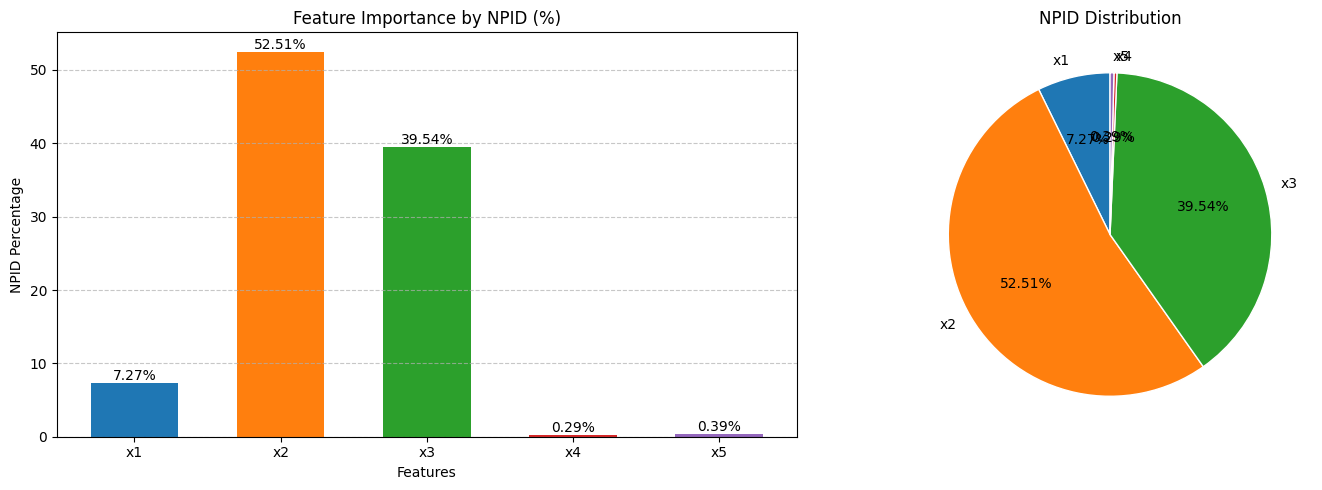

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

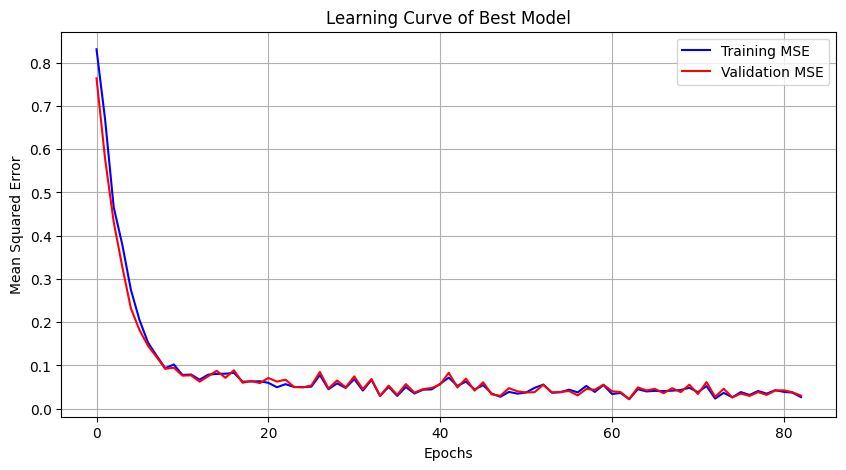


Total Epochs Used: 83


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
import matplotlib.pyplot as plt
import shap

# 1. โหลดและเตรียมข้อมูล
df = pd.read_excel('/content/drive/MyDrive/MachineLearning/Hw2/ML3.xlsx')
X = df[['x1', 'x2', 'x3', 'x4', 'x5']]
y = df['y']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 2. กำหนดพารามิเตอร์สำหรับ Grid Search
param_grid = {
    'hidden_layer_sizes': [
        (6,),       # 5-6-1
        (10,),      # 5-10-1
        (50,),      # 5-50-1
        (100,),     # 5-100-1
        (50, 20),   # 5-50-20-1
        (100, 50),  # 5-100-50-1
        (150, 100, 50)  # 5-150-100-50-1
    ],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization
    'learning_rate_init': [0.001, 0.01]
}

# 3. สร้างโมเดลและทำ Grid Search
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
model = MLPRegressor(solver='adam', max_iter=2000, early_stopping=True, random_state=42)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=mse_scorer,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

# 4. แสดงผลลัพธ์
print("\n=== Best Parameters ===")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

# 5. ประเมินโมเดลที่ดีที่สุด
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== Best Model Performance ===")
print(f"MSE: {mse:.6f}")
print(f"MAE: {mae:.6f}")
print(f"R²: {r2:.4f}")

# 6. วิเคราะห์ความสำคัญตัวแปรด้วย SHAP
explainer = shap.KernelExplainer(best_model.predict, X_train[:100])
shap_values = explainer.shap_values(X_test)

shap_importance = np.mean(np.abs(shap_values), axis=0)
ID = shap_importance
NPID = (ID / np.sum(ID)) * 100

results = pd.DataFrame({
    'Variable': ['x1', 'x2', 'x3', 'x4', 'x5'],
    'ID': ID,
    'NPID (%)': NPID
})

print("\n=== Feature Importance ===")
print(results.round(4))

# 7. Visualization
plt.figure(figsize=(15, 5))

# Bar chart
plt.subplot(1, 2, 1)
bars = plt.bar(results['Variable'], results['NPID (%)'],
              color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'],
              width=0.6)
plt.title('Feature Importance by NPID (%)')
plt.xlabel('Features')
plt.ylabel('NPID Percentage')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%', ha='center', va='bottom')

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(results['NPID (%)'],
        labels=results['Variable'],
        autopct='%1.2f%%',
        colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'],
        startangle=90,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('NPID Distribution')

plt.tight_layout()
plt.show()

# 8. Plot learning curve ของโมเดลที่ดีที่สุด
train_mse = []
test_mse = []
epochs = 2000

best_model = MLPRegressor(**grid_search.best_params_, solver='adam', max_iter=1, warm_start=True, random_state=42)

for epoch in range(epochs):
    best_model.fit(X_train, y_train)
    train_mse.append(mean_squared_error(y_train, best_model.predict(X_train)))
    test_mse.append(mean_squared_error(y_test, best_model.predict(X_test)))

    if epoch > 50 and (test_mse[-50] - test_mse[-1]) < 1e-6:
        break

plt.figure(figsize=(10, 5))
plt.plot(train_mse, 'b-', label='Training MSE')
plt.plot(test_mse, 'r-', label='Validation MSE')
plt.title('Learning Curve of Best Model')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nTotal Epochs Used: {len(train_mse)}")